In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def CSPSA(psi_est, nu_ite, fun_teor, fun,
          s=1, t=1/6, a=3, A=1, b = 0.1 ):
    """
    CSPSA
    IN
        psi_est: dim x n_par matrix. dim is de dimension of each vector, and n_par
                the number of guesses in parallel.
        nu_ite: int. Number of iterations of CSPSA.
        fun_teor: function. It is the known function, for example, the theoretical
                 fidelity between the unknown state of the system and the guess.
        fun: function. CSPSA uses this function for the optimization.
        s, t, a, A, b: parametros CSPSA
    OUT
        valor_optimo: real. Optimal value of fun finded by CSPSA.
    """

    n_par = int(psi_est.size/psi_est.shape[0])
    valor_optimo = np.zeros((n_par, nu_ite))
    valor_optimo[:,0] = fun_teor(psi_est)

    for k in range(0,nu_ite-1):
        valor_optimo[:,k+1], psi_est = (itCSPSA(psi_est/np.linalg.norm(psi_est, axis = 0),
                                       k, s, t, a, A, b, fun, fun_teor ))


    return valor_optimo

In [3]:
def itCSPSA(z_k,  k, s, t, a, A, b, fun, fun_teor):
    """iteracion de CSPSA
    IN
        z_k: dim x n_rep. Cada columna es un estimador de dimension dim.
        k: iteracion
        s, t, a, A, b: parametros CSPSA
        fun: funcion a optimizar
    OUT
        z_k: dim x n_rep. Estimador actualizado
        z_value: real. valor de fun en el estimador z_k
    """
    dim = z_k.shape[0]
    rep = int(z_k.size/z_k.shape[0])
    alpha = a/(k+1+A)**s
    beta = b/(k+1)**t
    delta = (1j)**(np.random.randint(1,5,(dim, rep))).reshape(2,rep)
    z_k_mas = z_k + beta*delta
    z_k_menos = z_k - beta*delta
    fun_k_mas = fun(z_k_mas)
    fun_k_menos = fun(z_k_menos)
    grad = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta.conj())
    z_k = z_k - alpha*grad
    z_value = fun_teor(z_k)
    return z_value, z_k

In [4]:
def SPSA(psi_est, nu_ite, fun_teor, fun,
          s=1, t=1/6, a=3, A=1, b = 0.1 ):
    """
    SPSA
    IN
        psi_est: dim x n_par matrix. dim is de dimension of each vector, and n_par
                the number of guesses in parallel.
        nu_ite: int. Number of iterations of SPSA.
        fun_teor: function. It is the known function, for example, the theoretical
                 fidelity between the unknown state of the system and the guess.
        fun: function. SPSA uses this function for the optimization.
        s, t, a, A, b: parametros SPSA
    OUT
        valor_optimo: real. Optimal value of fun finded by SPSA.
    """

    n_par = int(psi_est.size/psi_est.shape[0])
    valor_optimo = np.zeros((n_par, nu_ite))
    valor_optimo[:,0] = fun_teor(psi_est)

    for k in range(0,nu_ite-1):
        valor_optimo[:,k+1], psi_est = (itSPSA(psi_est/np.linalg.norm(psi_est, axis = 0),
                                       k, s, t, a, A, b, fun, fun_teor ))


    return valor_optimo

In [5]:
def itSPSA(z_k,  k, s, t, a, A, b, fun, fun_teor):
    """iteracion de SPSA
    IN
        z_k: dim x n_rep. Cada columna es un estimador de dimension dim.
        k: iteracion
        s, t, a, A, b: parametros SPSA
        fun: funcion a optimizar
    OUT
        z_k: dim x n_rep. Estimador actualizado
        z_value: real. valor de fun en el estimador z_k
    """
    dim = z_k.shape[0]
    rep = int(z_k.size/z_k.shape[0])
    alpha = a/(k+1+A)**s
    beta = b/(k+1)**t
    
    #Cambiamos un delta complejo por uno real (+1,-1)
    
    delta = (-1)**(np.random.randint(1,5,(dim, rep))).reshape(2,rep)
    delta_i = (-1)**(np.random.randint(1,5,(dim, rep))).reshape(2,rep)
    
    #Definimos parte real e imaginaria
    
    z_k_mas_r = np.real(z_k) + beta*delta
    z_k_menos_r = np.real(z_k) - beta*delta
    
    z_k_mas_i = np.imag(z_k) + beta*delta_i
    z_k_menos_i = np.imag(z_k) - beta*delta_i
    

    #Nuevo estado, normalizado
    
    z_k_mas = z_k_mas_r +1j*z_k_mas_i
    z_k_menos = z_k_menos_r+1j*z_k_menos_i
    
    z_k_mas = z_k_mas/np.linalg.norm(z_k_mas, axis=0)
    z_k_menos = z_k_menos/np.linalg.norm(z_k_menos, axis=0)
    
    fun_k_mas = fun(z_k_mas)
    fun_k_menos = fun(z_k_menos)
    
    #Gradiente real e imaginaria
    
    grad = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta)
    grad_i = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta_i)
    
    z_k = z_k - alpha*grad - 1j*alpha*grad_i
    z_k = z_k/np.linalg.norm(z_k, axis=0)
    
    z_value = fun_teor(z_k)
    return z_value, z_k

In [6]:
# Definir Estado

def estado(dim, n_par):
    psi = (np.random.normal(loc=0.0, scale=1.0,
           size=(dim, n_par))
           + np.random.normal(loc=0.0, scale=1.0,
           size=(dim, n_par))*1j)
    psi = psi/np.linalg.norm(psi, axis=0)
    return psi

In [7]:
# Definir Hamiltoniano

def H_paul (A,B,C):
    pauli_x = np.array((((0, 1), (1, 0))))
    pauli_y = np.array((((0, -1j), (1j, 0))))
    pauli_z = np.array((((1, 0), (0, -1))))
    H_paul = A*pauli_x + B*pauli_y + C*pauli_z
    return H_paul

In [8]:
# Definir Valor de expectacion

def exp_H (psi_est, H):
    psi = np.matrix(psi_est)
    psi = psi/np.linalg.norm(psi, axis=0)
    psi_dagger = psi.getH()
    H = np.matrix(H)
    exp_H = psi_dagger*H*psi
    return exp_H

In [9]:
d = 2
nu_par = 1
NU_ITERACIONES = 300

#A = np.sqrt(0.3)
#B = np.sqrt(0.2)
#C = np.sqrt(0.5)
A = 1
B = 3
C = 5

In [10]:
psi_est = estado(d,nu_par)


In [11]:
H = H_paul(A,B,C)


In [12]:
fun = lambda x : exp_H(x, H)


In [13]:
# Ground-state Teórico

E = A**2 + B**2 + C**2

const1 = np.sqrt(1/2) * np.sqrt((A**2+B**2)/(E-C*(np.sqrt(E))))
const2 = (C-np.sqrt(E))/(A+1j*B)

#psi_teo = const1*np.matrix([[const2], [1]])
#fun(psi_teo)

Ground_teo = -(np.sqrt(A**2 + B**2 + C**2))
print(Ground_teo)

-5.916079783099616


In [14]:
Result_CSPSA = CSPSA(psi_est, NU_ITERACIONES, fun, fun)

/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


In [15]:
Result_SPSA = SPSA(psi_est, NU_ITERACIONES, fun, fun)

/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


In [16]:
error_CSPSA = abs(Result_CSPSA - Ground_teo)
error_SPSA = abs(Result_SPSA - Ground_teo)

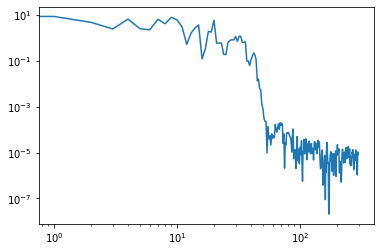

In [17]:
#plt.plot(np.array(error_CSPSA[:]).T)
plt.loglog(np.array(error_CSPSA[:]).T)

#plt.plot(np.array(Result_CSPSA[:]).T)
#plt.loglog(np.array(Result_CSPSA[:]).T)

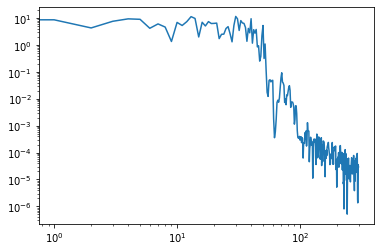

In [18]:
#plt.plot(np.array(error_SPSA[:]).T)
plt.loglog(np.array(error_SPSA[:]).T)

#plt.plot(np.array(Result_SPSA[:]).T)
#plt.loglog(np.array(Result_SPSA[:]).T)

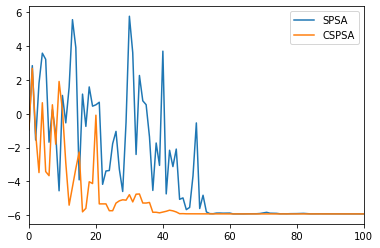

In [27]:
plt.plot(np.array(Result_SPSA[:]).T, label='SPSA')
plt.plot(np.array(Result_CSPSA[:]).T,label='CSPSA')
plt.xlim(0,100)
#plt.ylim(-7,-4)
plt.legend()

In [20]:
np.savetxt('prueba.txt', Result_SPSA, delimiter=',')
print(Result_SPSA)

[[-0.93576593  2.84065221 -1.55391745  1.79925874  3.57747568  3.21488448
  -1.6809172   0.24021759 -1.21388583 -4.54977234  1.08050151 -0.53839212
   1.56561349  5.55593736  3.90954106 -3.90321802  1.15825767 -0.74702677
   1.58319574  0.4464379   0.52779012  0.67769881 -4.1686115  -3.38130065
  -3.35268396 -1.76783941 -1.04184584 -3.27975027 -4.59067384 -0.50321856
   5.75764765  3.60720092 -2.40458261  2.25932997  0.76395409  0.5341652
  -1.36823126 -4.52881795 -1.72870044 -3.05121644  3.69633574 -4.73368126
  -2.1567762  -3.12141522 -2.08723561 -5.05583523 -4.96983493 -5.66230211
  -5.53208158 -3.66642543 -0.54251607 -5.59722933 -4.81390194 -5.79843019
  -5.89853008 -5.90371938 -5.86761524 -5.8643547  -5.87340075 -5.86805976
  -5.86697145 -5.91424201 -5.91572102 -5.91548031 -5.91437665 -5.90871528
  -5.90715959 -5.90858877 -5.90519983 -5.89098267 -5.85598347 -5.82258231
  -5.87360179 -5.87727547 -5.88448863 -5.90874043 -5.90591057 -5.91002703
  -5.90207317 -5.90285427 -5.89772451 -

In [21]:
np.savetxt('prueba.txt', Result_CSPSA, delimiter=',')
print(Result_CSPSA)

[[-0.93576593  2.67963686 -1.16310787 -3.47486973  0.64929944 -3.41498424
  -3.65771546  0.52922277 -1.79569617  1.90565348  0.21890563 -2.89191457
  -5.39865202 -4.32054226 -3.23498928 -2.26082594 -5.79319983 -5.58890875
  -4.01650907 -4.1238347  -0.08624428 -5.32367211 -5.32374809 -5.32357125
  -5.72670218 -5.72715627 -5.27765894 -5.14316581 -5.08153552 -5.10482141
  -4.7793089  -5.20698176 -4.75098535 -4.73931975 -5.27229448 -5.27410448
  -5.23963173 -5.81916143 -5.81868497 -5.85314006 -5.80418076 -5.76044527
  -5.69691697 -5.73425061 -5.80095759 -5.90271763 -5.900034   -5.90995209
  -5.91077304 -5.91478817 -5.91525279 -5.91576739 -5.91584719 -5.91585101
  -5.91607027 -5.91594573 -5.91604027 -5.91602501 -5.91605856 -5.91601475
  -5.91603826 -5.91602526 -5.9160353  -5.91591223 -5.91597679 -5.91600267
  -5.91595113 -5.91590211 -5.91597765 -5.9158813  -5.91592762 -5.91588898
  -5.91590971 -5.91605463 -5.91601388 -5.9160777  -5.91605342 -5.91605815
  -5.91600727 -5.91600816 -5.91601127 

In [22]:
print(psi_est)
fun(psi_est)

[[-0.55688333+0.60137344j]
 [ 0.36014124+0.44556619j]]


matrix([[-0.93576593+0.j]])